In [331]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'f:\InternShip\MySoft-data-analytics\HDA-Buet-vtraining-23\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [332]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'f:\InternShip\MySoft-data-analytics\HDA-Buet-vtraining-23\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [333]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [334]:
import matplotlib.pyplot as plt

In [335]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "cse18133",
                                           host = "localhost",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

In [336]:
con = PostgresConnection().getConnection()

Connection to DB established!


# Q1: Find the division wise total_sale_price joining fact table and respective dimension table

In [337]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()

Connection to DB established!


In [338]:
records

[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [339]:
df_q1 = pd.DataFrame(records, columns=['division', 'sales'])
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [340]:
df_q1 =df_q1.drop(7)

In [341]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [342]:
def changetype(x):
    x['sales']=x['sales'].astype('float64')  

In [343]:
changetype(df_q1)

In [344]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [345]:
df_q1=df_q1.set_index(['division'])
df_q1

,sales
division,
BARISAL,7520343.75
CHITTAGONG,19763595.00
DHAKA,40764619.75
KHULNA,11311610.50
RAJSHAHI,12099196.00
RANGPUR,8429836.50
SYLHET,5512234.25


<Axes: ylabel='sales'>

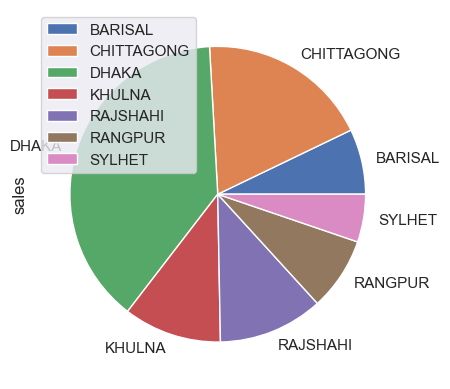

In [346]:
df_q1.plot.pie(y='sales')

<Axes: xlabel='division'>

<Figure size 1000x500 with 0 Axes>

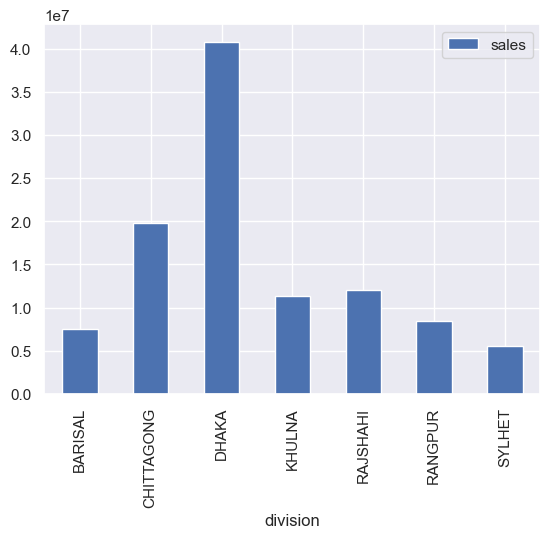

In [347]:
plt.figure(figsize=(10,5))
df_q1.plot.bar(y='sales')

In [348]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()

Connection to DB established!


In [349]:
records

[(2014, Decimal('14334731.25')),
 (2015, Decimal('15095720.25')),
 (2016, Decimal('14976508.25')),
 (2017, Decimal('15015806.00')),
 (2018, Decimal('15108197.25')),
 (2019, Decimal('14949510.25')),
 (2020, Decimal('15037190.25')),
 (2021, Decimal('883772.25')),
 (None, Decimal('105401435.75'))]

In [350]:
df_q1 = pd.DataFrame(records, columns=['year', 'sales'])


In [351]:
df_q1

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25
8,NaN,105401435.75


In [352]:
df_q1 =df_q1.drop(8)
df_q1

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25


In [353]:
df_q1['year'] = df_q1['year'].astype('int64')
df_q1['sales'] = df_q1['sales'].astype('float64')
df_q1

,year,sales
0,2014,14334731.25
1,2015,15095720.25
2,2016,14976508.25
3,2017,15015806.00
4,2018,15108197.25
5,2019,14949510.25
6,2020,15037190.25
7,2021,883772.25


<Axes: ylabel='sales'>

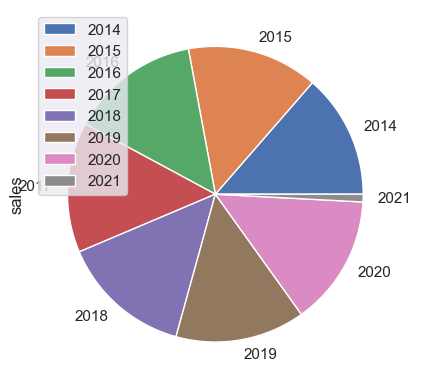

In [354]:
df_q1=df_q1.set_index(['year'])
df_q1.plot.pie(y='sales')

<Axes: xlabel='year'>

<Figure size 1000x500 with 0 Axes>

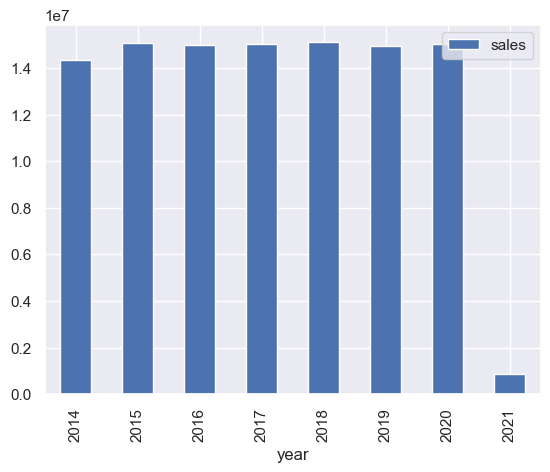

In [355]:
plt.figure(figsize=(10,5))
df_q1.plot.bar(y='sales')

Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

In [356]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT tr.bank_name, SUM(t.total_price)"\
                "FROM star_schema.fact_table t "\
                "JOIN star_schema.trans_dim tr on tr.payment_key=t.payment_key "\
                "GROUP BY CUBE(tr.bank_name) "\
                "ORDER BY tr.bank_name "
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


In [357]:
records

[('AB Bank Limited', Decimal('2728515.50')),
 ('Bangladesh Commerce Bank Limited', Decimal('2730999.25')),
 ('Bank Asia Limited', Decimal('2687142.75')),
 ('Bengal Commercial Bank Ltd', Decimal('2704554.25')),
 ('Bkash', Decimal('2689352.50')),
 ('BRAC Bank Limited', Decimal('2705795.75')),
 ('Citizens Bank Limited', Decimal('2723215.25')),
 ('City Bank Limited', Decimal('2713952.50')),
 ('Community Bank Bangladesh Limited', Decimal('2685751.50')),
 ('Dhaka Bank Limited', Decimal('2728366.00')),
 ('Dutch-Bangla Bank Limited', Decimal('2692435.25')),
 ('Eastern Bank Limited', Decimal('2687182.25')),
 ('IFIC Bank Limited', Decimal('2699759.75')),
 ('Jamuna Bank Limited', Decimal('2689886.50')),
 ('Meghna Bank Limited', Decimal('2700528.50')),
 ('Mercantile Bank Limited', Decimal('2676578.50')),
 ('Midland Bank Limited', Decimal('2688430.25')),
 ('Modhumoti Bank Limited', Decimal('2715279.00')),
 ('Mutual Trust Bank Limited', Decimal('2670030.50')),
 ('Nagad', Decimal('2699554.50')),
 ('N

In [358]:
df_q2_bank = pd.DataFrame(records, columns=['bank_name', 'sales'])
df_q2_bank

,bank_name,sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


In [359]:
# drop the row with none value
df_q2_bank = df_q2_bank.dropna()
df_q2_bank


,bank_name,sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


In [360]:
df_q2_bank.dtypes

bank_name    object
sales        object
dtype: object

In [361]:
changetype(df_q2_bank)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9344\369198803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sales']=x['sales'].astype('float64')


In [362]:
# df_q2_bank = df_q2_bank.set_index(['bank_name'])

In [363]:
# plt.figure(figsize=(30,15))
# df_q2_bank.plot.bar(y='sales')

C:\Users\Dell\AppData\Local\Temp\ipykernel_9344\2785082362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q2_bank.sort_values(by=['sales'], ascending=False, inplace=True)


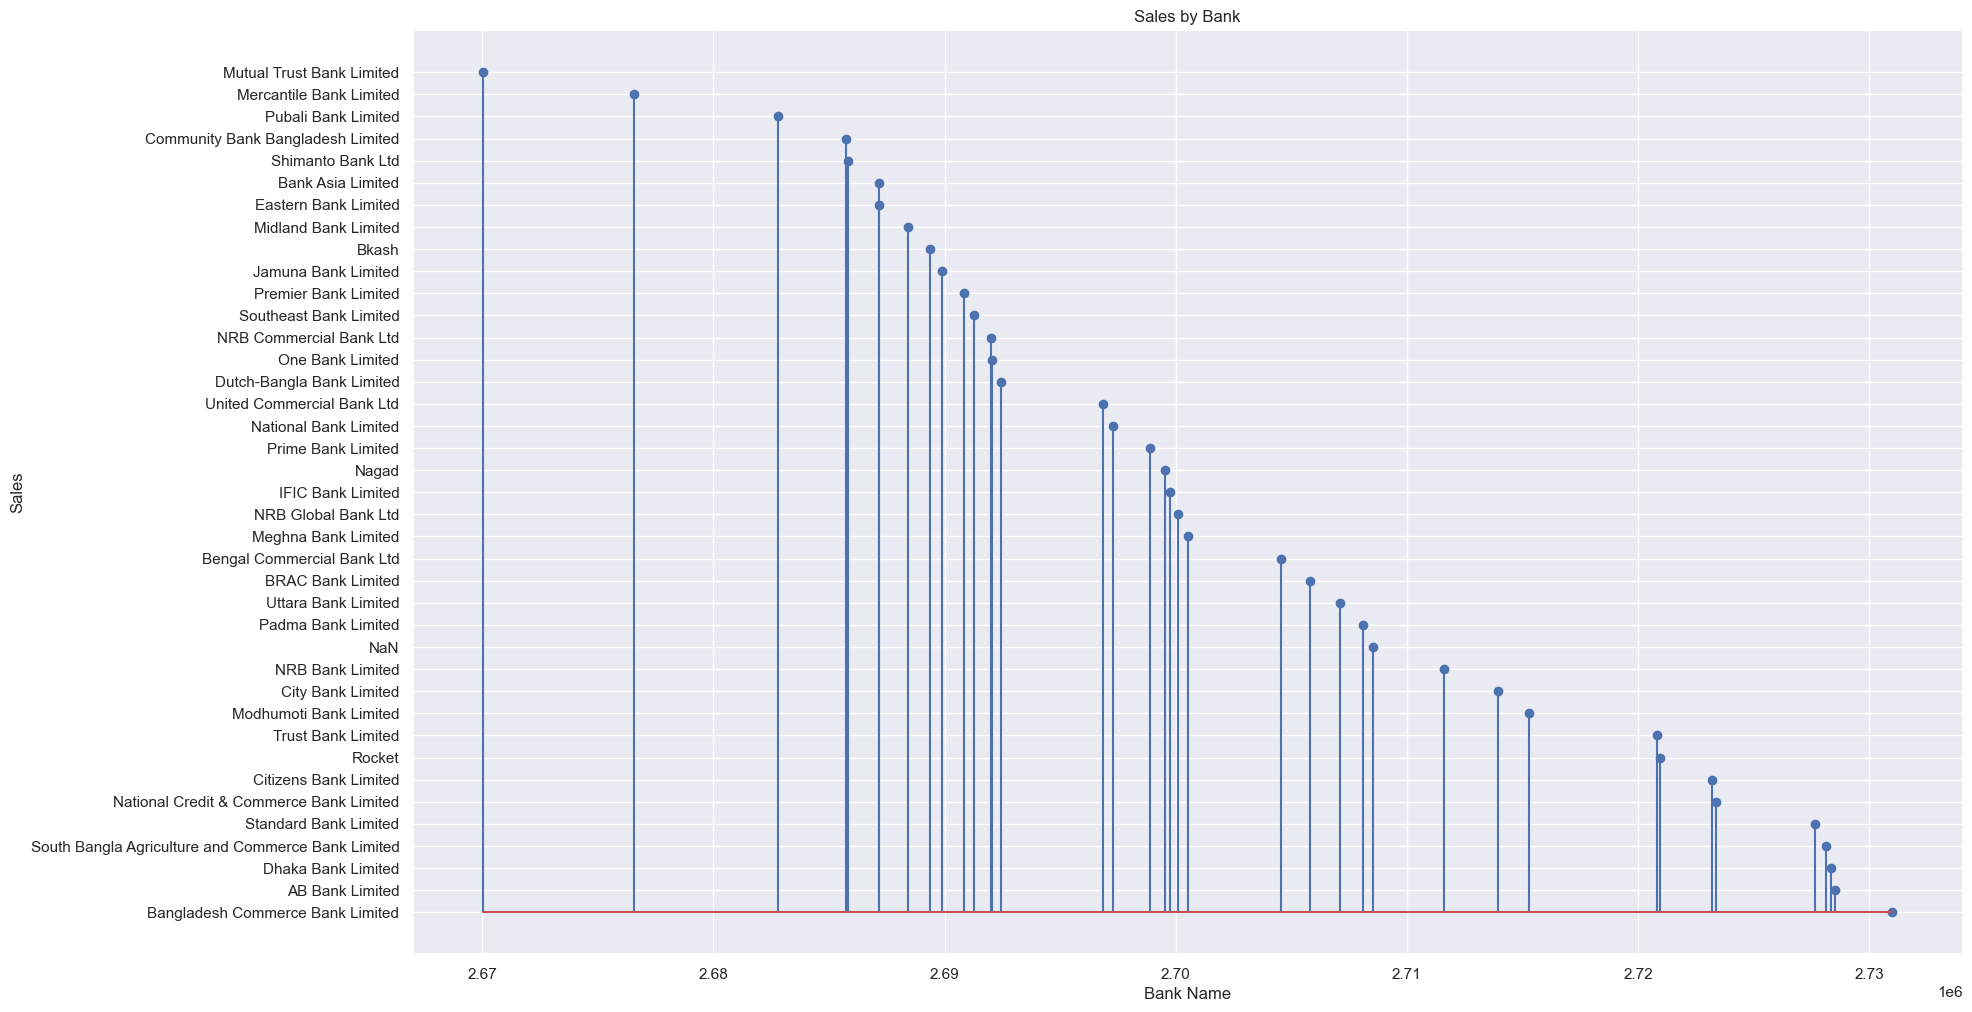

In [415]:
plt.figure(figsize=(20,12))
plt.title('Sales by Bank')
plt.xlabel('Bank Name')
plt.ylabel('Sales')
df_q2_bank.sort_values(by=['sales'], ascending=False, inplace=True)
plt.stem(df_q2_bank['sales'],df_q2_bank['bank_name'])
plt.show()


Transaction Type

In [365]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT tr.trans_type, SUM(t.total_price)" \
                "FROM star_schema.fact_table t " \
                "JOIN star_schema.trans_dim tr on tr.payment_key=t.payment_key " \
                "GROUP BY CUBE(tr.trans_type) " \
                "ORDER BY tr.trans_type "
cur.execute(select_stmt)
records = cur.fetchall()

Connection to DB established!


In [366]:
records

[('card', Decimal('94583038.50')),
 ('cash', Decimal('2708515.75')),
 ('mobile', Decimal('8109881.50')),
 (None, Decimal('105401435.75'))]

In [367]:
df_q2_payment_type = pd.DataFrame(records,columns=['payment_type','sales'])
df_q2_payment_type

,payment_type,sales
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50
3,None,105401435.75


In [368]:
df_q2_payment_type = df_q2_payment_type.dropna()
df_q2_payment_type

,payment_type,sales
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50


In [369]:
df_q2_payment_type.dtypes

payment_type    object
sales           object
dtype: object

In [370]:
changetype(df_q2_payment_type)


C:\Users\Dell\AppData\Local\Temp\ipykernel_9344\369198803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sales']=x['sales'].astype('float64')


In [371]:
df_q2_payment_type = df_q2_payment_type.set_index(['payment_type'])

<Axes: xlabel='payment_type'>

<Figure size 3000x1500 with 0 Axes>

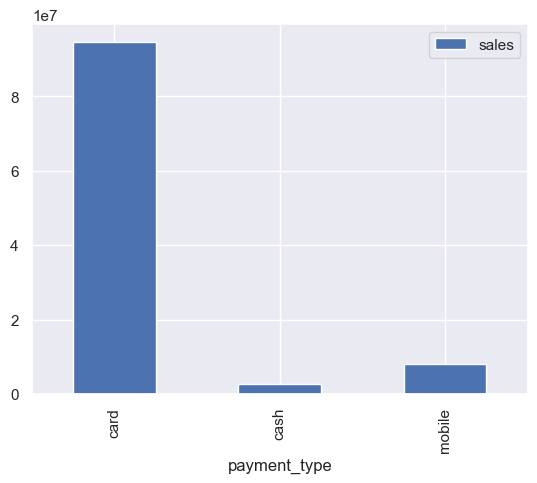

In [372]:
plt.figure(figsize=(30,15))
df_q2_payment_type.plot.bar(y='sales')

<Axes: ylabel='sales'>

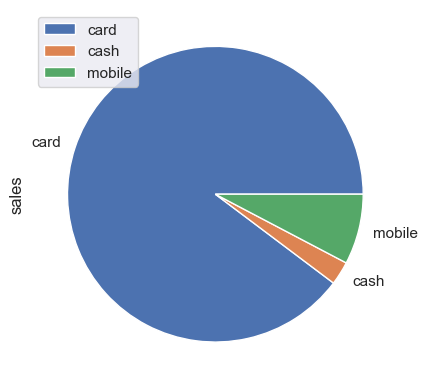

In [373]:
# pie chart
df_q2_payment_type.plot.pie(y='sales')

## Q3: Total sales in Barisal

In [374]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
                "FROM star_schema.fact_table t " \
                "JOIN star_schema.store_dim s on s.store_key=t.store_key " \
                "WHERE s.division = 'BARISAL' " \
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division "
                
                
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


In [375]:
records

[('BARISAL', Decimal('7520343.75')), (None, Decimal('7520343.75'))]

In [376]:
df_q3 = pd.DataFrame(records, columns=['division', 'sales'])
df_q3

,division,sales
0,BARISAL,7520343.75
1,None,7520343.75


In [377]:
df_q3 =df_q3.dropna()
df_q3

,division,sales
0,BARISAL,7520343.75


## Q4: Total sales in 2015

In [378]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT t.year, SUM(f.total_price) " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.time_dim t on t.time_key=f.time_key " \
                "WHERE t.year = 2015 " \
                "GROUP BY CUBE(t.year) " \
                "ORDER BY t.year "
cur.execute(select_stmt)
records = cur.fetchall()


Connection to DB established!


In [379]:
records

[(2015, Decimal('15095720.25')), (None, Decimal('15095720.25'))]

In [380]:
df_q4 = pd.DataFrame(records, columns=['year', 'sales'])
df_q4

,year,sales
0,2015.0,15095720.25
1,NaN,15095720.25


In [381]:
df_q4 =df_q4.dropna()
df_q4

,year,sales
0,2015.0,15095720.25


In [382]:
df_q4['year'] = df_q4['year'].astype('int64')
df_q4['sales'] = df_q4['sales'].astype('float64')

C:\Users\Dell\AppData\Local\Temp\ipykernel_9344\578426641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q4['year'] = df_q4['year'].astype('int64')
C:\Users\Dell\AppData\Local\Temp\ipykernel_9344\578426641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q4['sales'] = df_q4['sales'].astype('float64')


In [383]:
df_q4

,year,sales
0,2015,15095720.25


## Q5: Total sales of Barisal in 2015

In [384]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, t.year,SUM(f.total_price) AS total_sales " \
    "FROM star_schema.fact_table f " \
    "JOIN star_schema.store_dim s ON f.store_key = s.store_key " \
    "JOIN star_schema.time_dim t ON f.time_key = t.time_key " \
    "WHERE s.division = 'BARISAL' AND t.year = 2015 " \
    "GROUP BY CUBE(s.division, t.year) " \
    "ORDER BY s.division, t.year "
    

cur.execute(select_stmt)
records = cur.fetchall()

Connection to DB established!


In [385]:
records

[('BARISAL', 2015, Decimal('1076902.75')),
 ('BARISAL', None, Decimal('1076902.75')),
 (None, None, Decimal('1076902.75')),
 (None, 2015, Decimal('1076902.75'))]

In [386]:
df_q5 = pd.DataFrame(records, columns=['division', 'year', 'sales'])
df_q5

,division,year,sales
0,BARISAL,2015.0,1076902.75
1,BARISAL,NaN,1076902.75
2,None,NaN,1076902.75
3,None,2015.0,1076902.75


In [387]:
df_q5 = df_q5.dropna()
df_q5

,division,year,sales
0,BARISAL,2015.0,1076902.75


In [388]:
df_q5['year'] = df_q5['year'].astype('int64')
df_q5['sales'] = df_q5['sales'].astype('float64')
df_q5

C:\Users\Dell\AppData\Local\Temp\ipykernel_9344\2483491113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q5['year'] = df_q5['year'].astype('int64')
C:\Users\Dell\AppData\Local\Temp\ipykernel_9344\2483491113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q5['sales'] = df_q5['sales'].astype('float64')


,division,year,sales
0,BARISAL,2015,1076902.75


# Q6: For each store(item supplier), what are the top three products offered that are most often purchased?
    S1-> item1 -> quantity_sales

    S1-> item2 -> quantity_sales

    S1-> item3 -> quantity_sales

In [389]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmt = "SELECT s.store_key as store_key , i.item_name as item_name, SUM(f.quantity) as quantity_sales "\
                "FROM star_schema.fact_table as f "\
                "JOIN star_schema.store_dim as s ON s.store_key = f.store_key " \
                "JOIN star_schema.item_dim as i ON i.item_key = f.item_key " \
                "GROUP BY CUBE(s.store_key, i.item_name) " \
                "ORDER BY s.store_key, sum(f.quantity) DESC "

curr.execute(select_stmt)
records = curr.fetchall()





Connection to DB established!


In [390]:
df_q6 = pd.DataFrame(records, columns=['store_key', 'item_name', 'quantity_sales'])
df_q6 = df_q6.dropna()
df_q6

,store_key,item_name,quantity_sales
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
4,S0001,Waterloo Sparkling Lime 12oz,70
5,S0001,Njoy Sugar Canister 22 oz,69
...,...,...,...
187835,S0099,Kind Bars Mini Variety Pack 0.7 oz,5
187836,S0099,Paper Plates 8.5 inch Ultra Strong,4
187837,S0099,Fuze Iced Tea,4
187838,S0099,Pringles Snak Stacks Variety,3


In [391]:
df_q6 = df_q6.groupby('store_key').head(3)
df_q6.head(20)

,store_key,item_name,quantity_sales
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
259,S0002,Planters Nut-trition 1.5 oz,83
260,S0002,Altoids Small Packs Variety,80
261,S0002,Muscle Milk Protein Shake Van. 11oz,78
518,S0003,Sprite - 12 oz cans,122
519,S0003,Diet Coke - 12 oz cans,109
520,S0003,Muscle Milk Protein Shake Van. 11oz,76
777,S0004,Kind Bars Variety Pack 1.4 oz,79


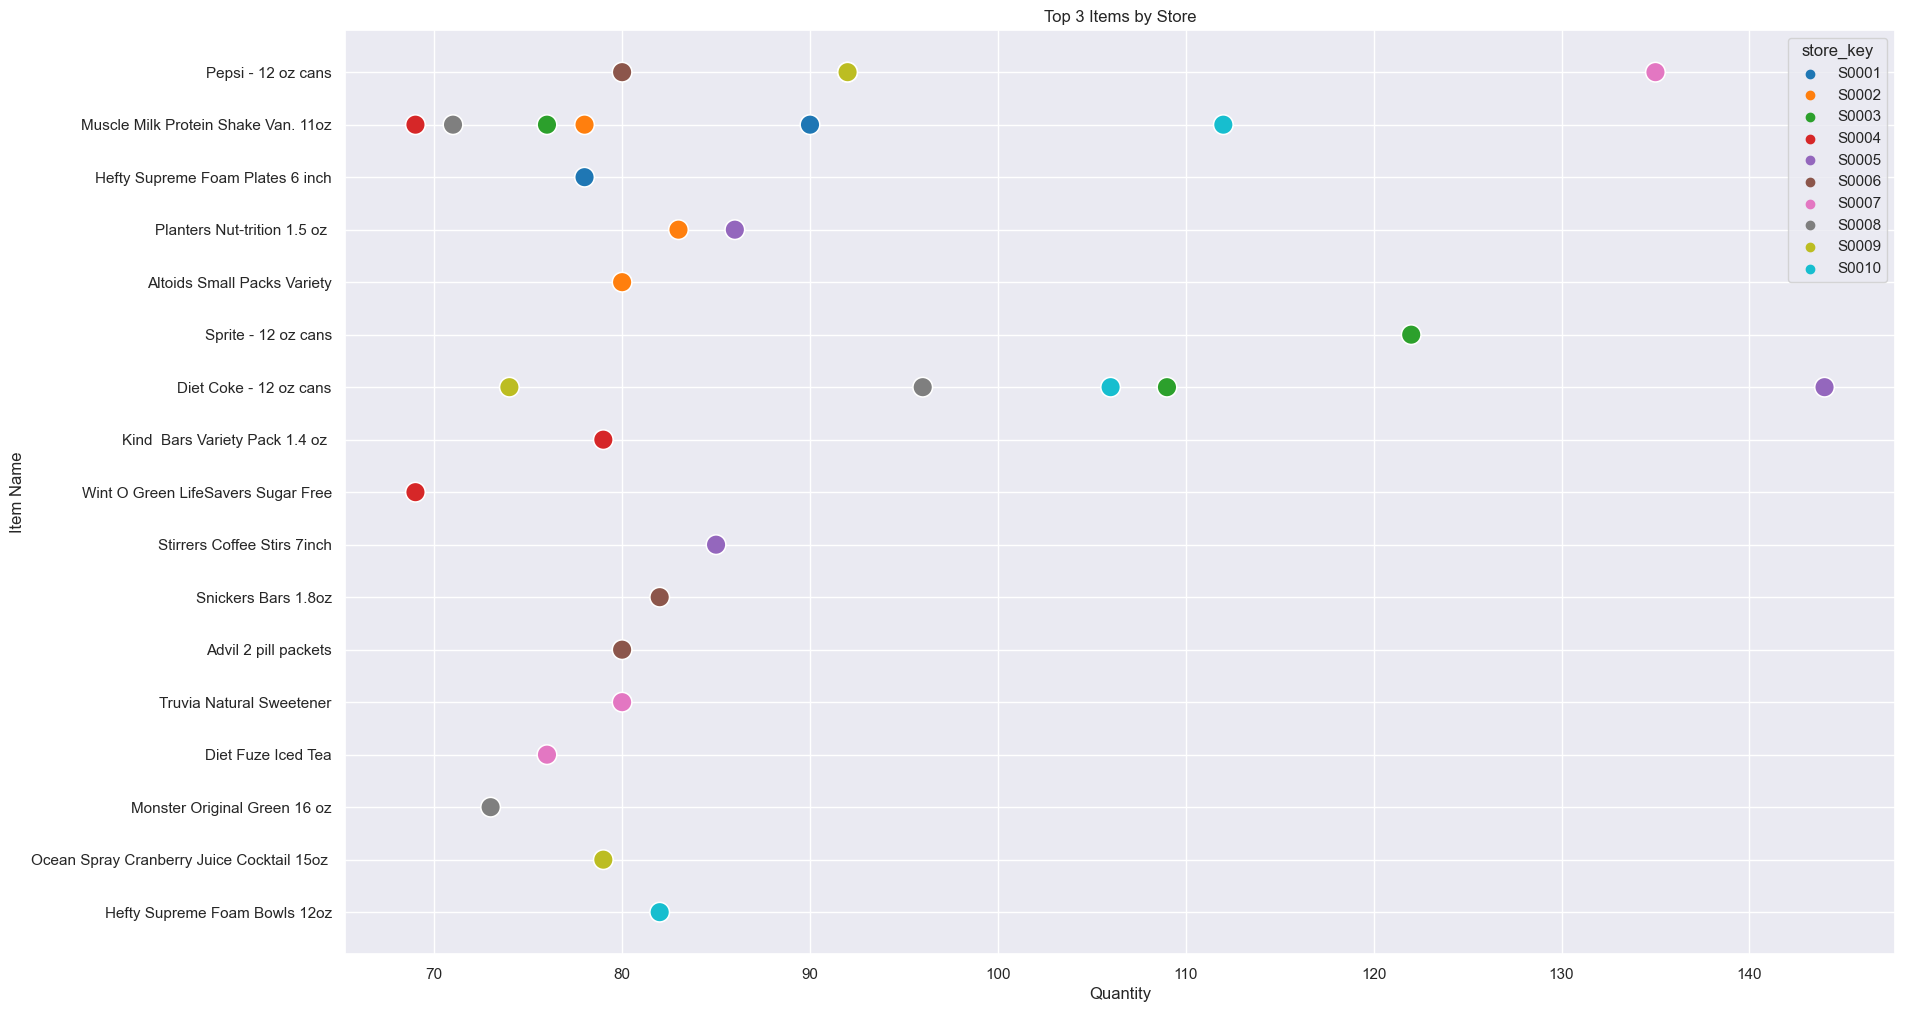

In [392]:
# take top 10 data
data = df_q6[:30]
plt.figure(figsize=(20,12))
plt.title('Top 3 Items by Store')
plt.xlabel('Quantity')
plt.ylabel('Item Name')
sns.scatterplot(x='quantity_sales', y='item_name', hue='store_key', palette='tab10', s=200,data=data)
sns.set(font_scale=2.0)

<Axes: title={'center': 'Top 3 Items by Store'}, xlabel='store_key', ylabel='quantity_sales'>

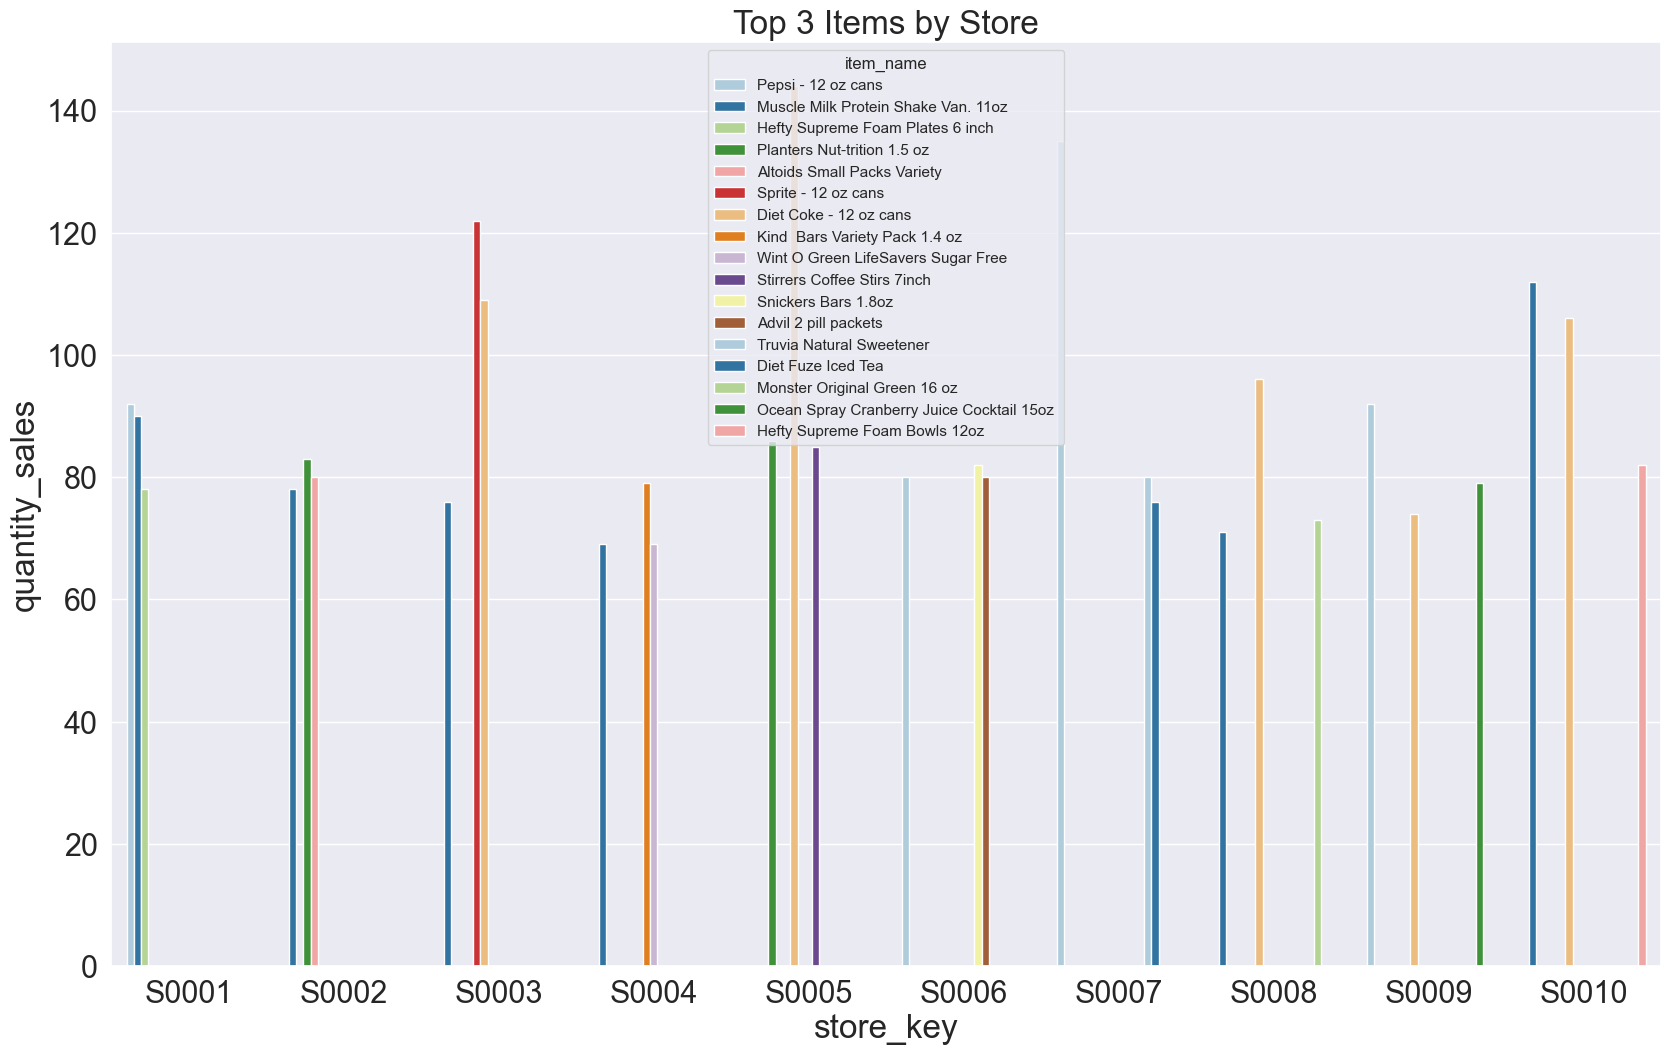

In [393]:
fig, ax = plt.subplots(figsize=(20,12))
plt.title('Top 3 Items by Store')
plt.ylabel('Quantity')
plt.xlabel('Store Key')
sns.set(font_scale=2.0)
sns.set_context("notebook")
sns.barplot(x=data['store_key'], y=data['quantity_sales'], hue=data['item_name'], palette='Paired', ax=ax)



# Q7: What products have been sold through card or mobile since X days?

    input: X = 5 days

    output: [item1, item2, item3, ...........]

In [394]:
no_of_days = input("Enter number of days: ")

In [395]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmt = "SELECT i.item_name as item_name , tim.t_date as date, tt.trans_type as trans_type " \
                "FROM star_schema.fact_table as f " \
                "JOIN star_schema.item_dim as i ON i.item_key = f.item_key " \
                "JOIN star_schema.time_dim as tim ON tim.time_key = f.time_key " \
                "JOIN star_schema.trans_dim as tt ON tt.payment_key = f.payment_key " \
                "WHERE tim.t_date > CURRENT_DATE - INTERVAL '"
select_stmt = select_stmt+ str(no_of_days) + " days' "
# select_stmt = select_stmt + str(no_of_days) + " days::interval) AND tt.trans_type = 'card' " 
print(select_stmt)
curr.execute(select_stmt)
records = curr.fetchall()
                

Connection to DB established!
SELECT i.item_name as item_name , tim.t_date as date, tt.trans_type as trans_type FROM star_schema.fact_table as f JOIN star_schema.item_dim as i ON i.item_key = f.item_key JOIN star_schema.time_dim as tim ON tim.time_key = f.time_key JOIN star_schema.trans_dim as tt ON tt.payment_key = f.payment_key WHERE tim.t_date > CURRENT_DATE - INTERVAL '1000 days' 


In [396]:
records

[('Fresca Black Cherry - 12 oz cans', datetime.date(2020, 12, 21), 'cash'),
 ('Cheez It White Cheddar 1.5 oz', datetime.date(2021, 1, 9), 'card'),
 ('Hazelnut International Delight', datetime.date(2020, 10, 20), 'card'),
 ('Coke Zero Sugar 12 oz cans', datetime.date(2020, 10, 18), 'card'),
 ('Coke Zero Sugar 12 oz cans', datetime.date(2021, 1, 3), 'card'),
 ('Red Bull Sugar Free 8.4 oz', datetime.date(2020, 9, 13), 'card'),
 ("Kellogg's Cereals Assortment Pack ", datetime.date(2021, 1, 4), 'card'),
 ('Fresca Black Cherry - 12 oz cans', datetime.date(2020, 11, 2), 'mobile'),
 ('Sargento String Cheese 0.75oz', datetime.date(2020, 11, 2), 'card'),
 ('Brisk Lemon Iced Tea - 12 oz cans', datetime.date(2020, 10, 29), 'card'),
 ('Pure White Sugar Packets', datetime.date(2020, 10, 20), 'card'),
 ('Stirrers Coffee Stirs 7inch', datetime.date(2020, 10, 6), 'card'),
 ('Dole Fruit in Gel Cups 4.3 oz', datetime.date(2021, 1, 9), 'card'),
 ('Waterloo Sparkling Grapefruit 12oz', datetime.date(2021, 1

In [397]:
data = pd.DataFrame(records, columns=['item_name','date','trans_type'])
data = data.dropna()
# split the data into two parts one for card and another for mobile
data

,item_name,date,trans_type
0,Fresca Black Cherry - 12 oz cans,2020-12-21,cash
1,Cheez It White Cheddar 1.5 oz,2021-01-09,card
2,Hazelnut International Delight,2020-10-20,card
3,Coke Zero Sugar 12 oz cans,2020-10-18,card
4,Coke Zero Sugar 12 oz cans,2021-01-03,card
...,...,...,...
57200,Nature Valley Sweet/Salty Almond Bars,2020-11-14,card
57201,G2 Lo Calorie Variety 20 oz,2020-09-28,card
57202,Pure Leaf Sweet Tea 8.5oz,2020-10-27,card
57203,Baked Chips Variety Mix Frito,2020-12-25,card


In [398]:
data['date'] = pd.to_datetime(data['date'])
data['trans_type'] = data['trans_type'].astype('str')
grouped = data.groupby('trans_type')
card = grouped.get_group('card')
mobile = grouped.get_group('mobile')
card


,item_name,date,trans_type
1,Cheez It White Cheddar 1.5 oz,2021-01-09,card
2,Hazelnut International Delight,2020-10-20,card
3,Coke Zero Sugar 12 oz cans,2020-10-18,card
4,Coke Zero Sugar 12 oz cans,2021-01-03,card
5,Red Bull Sugar Free 8.4 oz,2020-09-13,card
...,...,...,...
57200,Nature Valley Sweet/Salty Almond Bars,2020-11-14,card
57201,G2 Lo Calorie Variety 20 oz,2020-09-28,card
57202,Pure Leaf Sweet Tea 8.5oz,2020-10-27,card
57203,Baked Chips Variety Mix Frito,2020-12-25,card


In [399]:
mobile

,item_name,date,trans_type
7,Fresca Black Cherry - 12 oz cans,2020-11-02,mobile
22,Sunkist Orange - 12 oz cans,2020-10-03,mobile
62,"Go-Gurt Low Fat Yogurt, Strwbry & Berry",2020-12-22,mobile
63,Waterloo Sparkling Lemon 12oz,2020-12-04,mobile
64,Coffee-Mate Original Flavor Cold,2020-10-27,mobile
...,...,...,...
57151,La Croix Sparkling Lime 12 oz,2020-12-12,mobile
57161,"Dawn Ultra Dish Detergent, Original Scent",2020-11-16,mobile
57172,AquaFina Purified Drinking Water 16oz,2021-01-03,mobile
57174,Pure White Sugar Packets,2020-09-02,mobile


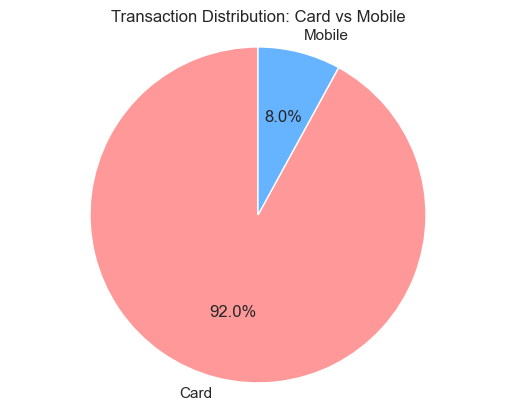

In [400]:
# import matplotlib.pyplot as plt

# Assuming you have separate DataFrames 'card' and 'mobile'

# Count the occurrences of each trans_type
card_count = card.shape[0]
mobile_count = mobile.shape[0]

# Create a list of counts
counts = [card_count, mobile_count]

# Create a list of labels
labels = ['Card', 'Mobile']

# Set the colors for the pie chart
colors = ['#ff9999', '#66b3ff']

# Create the pie chart
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Transaction Distribution: Card vs Mobile')

# Show the pie chart
plt.show()


# Q8: What season(quarter) is the worst for each product item? As example,

       item1-> q1

       item2-> q2

In [401]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmt = "SELECT i.item_name, tim.quarter, SUM(f.total_price) as total_price " \
                "FROM star_schema.fact_table as f " \
                "JOIN star_schema.item_dim as i ON i.item_key = f.item_key " \
                "JOIN star_schema.time_dim as tim ON tim.time_key = f.time_key " \
                "GROUP BY CUBE(i.item_name, tim.quarter) " \
                "ORDER BY i.item_name, SUM(f.total_price) "

curr.execute(select_stmt)
records = curr.fetchall()


Connection to DB established!


In [402]:
# records
df_q8 = pd.DataFrame(records, columns=['item_name', 'quarter', 'total_price'])
df_q8 = df_q8.dropna()
df_q8

,item_name,quarter,total_price
0,100% Juice Box Variety 6.75 oz,Q1,85470.0
1,100% Juice Box Variety 6.75 oz,Q4,87090.0
2,100% Juice Box Variety 6.75 oz,Q2,88140.0
3,100% Juice Box Variety 6.75 oz,Q3,90675.0
5,A&W Root Beer - 12 oz cans,Q2,65952.5
...,...,...,...
1288,Yoplait Original Yogurt Variety Pack,Q3,69132.0
1290,Zoo Animal Cookies/Crackers,Q1,76468.0
1291,Zoo Animal Cookies/Crackers,Q2,77112.0
1292,Zoo Animal Cookies/Crackers,Q4,77280.0


In [403]:
df_q8 = df_q8.groupby('item_name').head(1)
df_q8

,item_name,quarter,total_price
0,100% Juice Box Variety 6.75 oz,Q1,85470.0
5,A&W Root Beer - 12 oz cans,Q2,65952.5
10,A&W Root Beer Diet - 12 oz cans,Q4,37725.75
15,Advil 2 pill packets,Q1,76342.0
20,All Purpose Cleaner 409 Spray,Q1,95850.0
...,...,...,...
1270,Welch's 100% Juice Variety10 oz,Q2,93398.0
1275,Wint O Green LifeSavers Sugar Free,Q1,85168.0
1280,Wonderful Pistachios (in shell),Q1,122716.0
1285,Yoplait Original Yogurt Variety Pack,Q1,65112.0


In [404]:
df_q8 = df_q8[0:30]
df_q8

,item_name,quarter,total_price
0,100% Juice Box Variety 6.75 oz,Q1,85470.0
5,A&W Root Beer - 12 oz cans,Q2,65952.5
10,A&W Root Beer Diet - 12 oz cans,Q4,37725.75
15,Advil 2 pill packets,Q1,76342.0
20,All Purpose Cleaner 409 Spray,Q1,95850.0
25,Altoids Small Packs Variety,Q3,65592.0
30,Apple Sauce Variety GoGO Squeeze 3.2oz,Q4,78190.0
35,AquaFina Purified Drinking Water 16oz,Q1,47691.0
40,Austin Cookie Cracker Variety,Q1,78358.0
45,Austin Toasty Crackers w/ PBtr,Q2,73836.0


<Axes: title={'center': 'Worst Quarter for each item'}, xlabel='Quantity', ylabel='Item Name'>

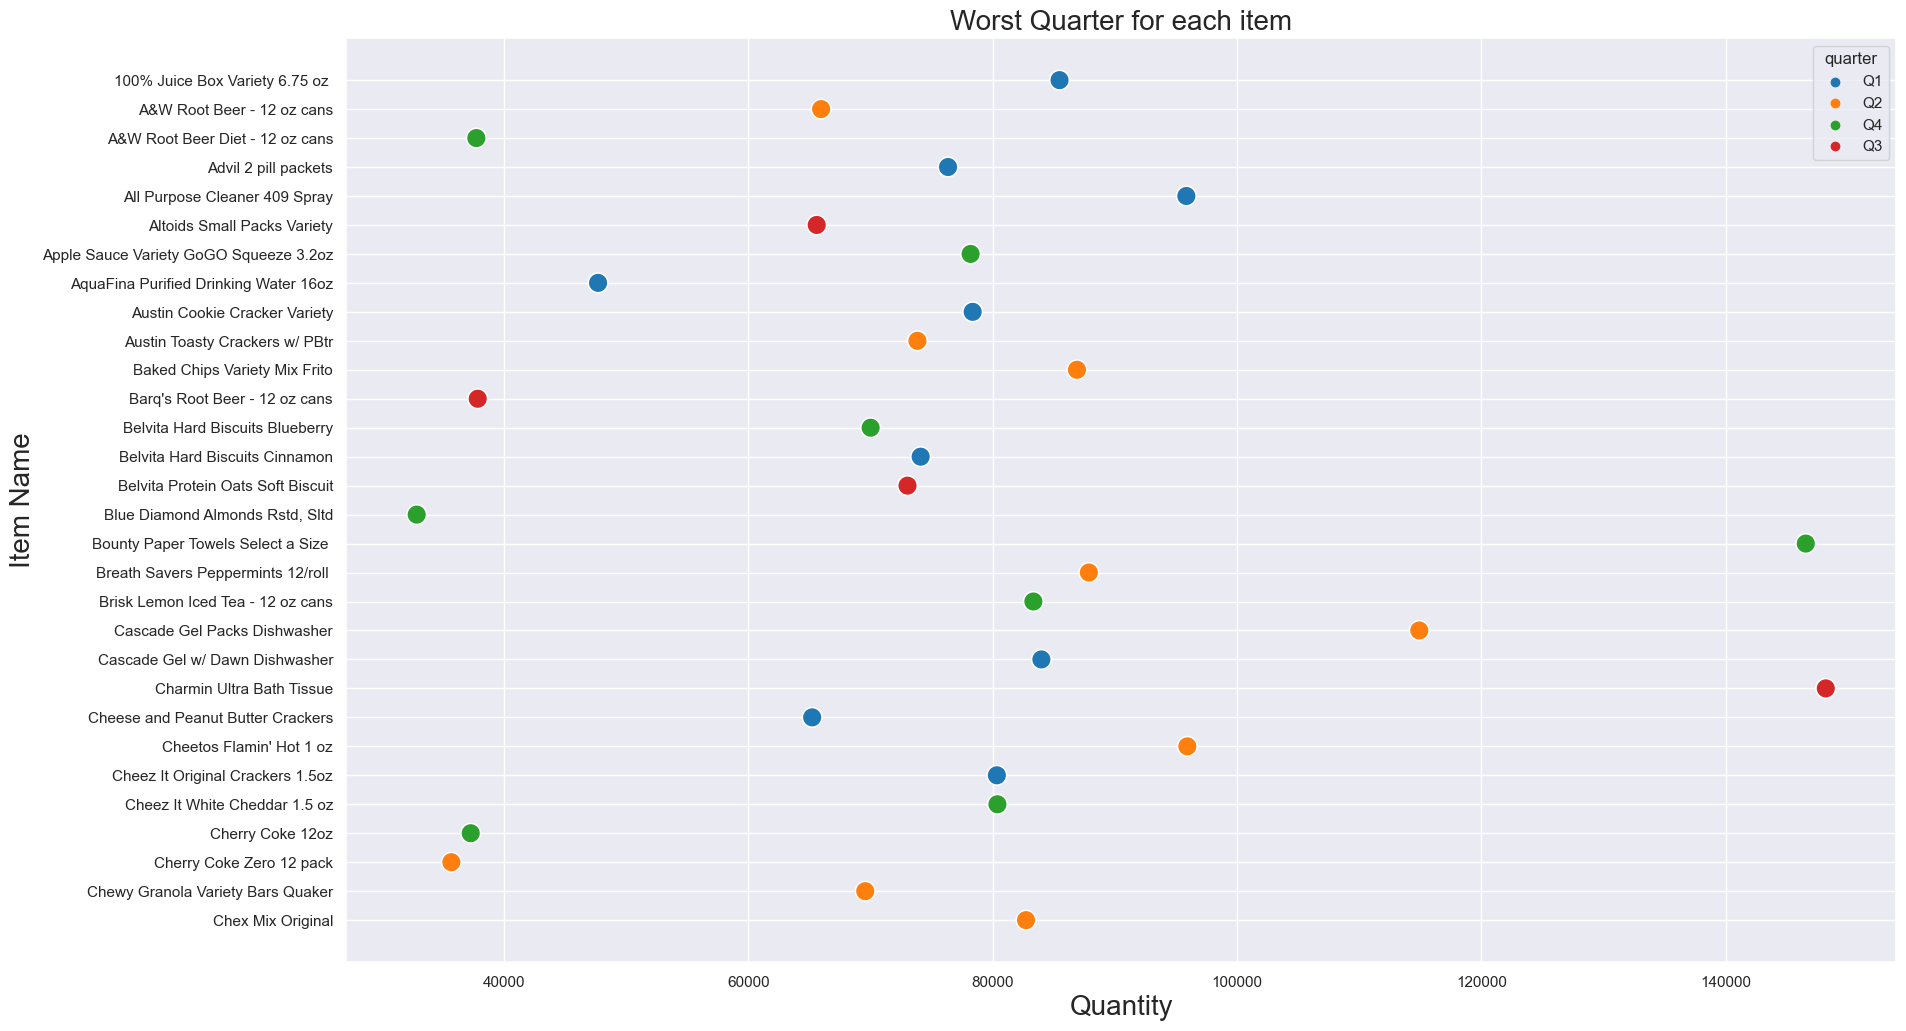

In [405]:

plt.figure(figsize=(20,12))
plt.title('Worst Quarter for each item',fontsize=20)
plt.xlabel('Quantity',fontsize=20)
plt.ylabel('Item Name',fontsize=20)
sns.set(font_scale=3.0)
sns.set_context("notebook")

sns.scatterplot(x='total_price', y='item_name', hue='quarter', palette='tab10', s=200,data=df_q8)

# Q9: Break down the total sales of items geographically (division-wise).

     item1-> division1->total_sales

     item1-> division2->total_sales

In [406]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmt = '''
SELECT s.division, i.item_name, sum(f.total_price)
FROM star_schema.fact_table f
JOIN star_schema.item_dim i ON i.item_key = f.item_key
JOIN star_schema.store_dim s ON s.store_key = f.store_key
GROUP BY CUBE(i.item_name, s.division)
ORDER BY i.item_name, s.division
'''
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


In [407]:
records

[('BARISAL', '100% Juice Box Variety 6.75 oz ', Decimal('23790.0')),
 ('CHITTAGONG', '100% Juice Box Variety 6.75 oz ', Decimal('64950.0')),
 ('DHAKA', '100% Juice Box Variety 6.75 oz ', Decimal('141195.0')),
 ('KHULNA', '100% Juice Box Variety 6.75 oz ', Decimal('37755.0')),
 ('RAJSHAHI', '100% Juice Box Variety 6.75 oz ', Decimal('38730.0')),
 ('RANGPUR', '100% Juice Box Variety 6.75 oz ', Decimal('26685.0')),
 ('SYLHET', '100% Juice Box Variety 6.75 oz ', Decimal('18270.0')),
 (None, '100% Juice Box Variety 6.75 oz ', Decimal('351375.0')),
 ('BARISAL', 'A&W Root Beer - 12 oz cans', Decimal('19101.5')),
 ('CHITTAGONG', 'A&W Root Beer - 12 oz cans', Decimal('52060.5')),
 ('DHAKA', 'A&W Root Beer - 12 oz cans', Decimal('107479.0')),
 ('KHULNA', 'A&W Root Beer - 12 oz cans', Decimal('28382.0')),
 ('RAJSHAHI', 'A&W Root Beer - 12 oz cans', Decimal('27795.5')),
 ('RANGPUR', 'A&W Root Beer - 12 oz cans', Decimal('21597.0')),
 ('SYLHET', 'A&W Root Beer - 12 oz cans', Decimal('15249.0')),
 (

In [408]:
df_q8 = pd.DataFrame(records, columns=['division','item_name','sales'])
df_q8

,division,item_name,sales
0,BARISAL,100% Juice Box Variety 6.75 oz,23790.0
1,CHITTAGONG,100% Juice Box Variety 6.75 oz,64950.0
2,DHAKA,100% Juice Box Variety 6.75 oz,141195.0
3,KHULNA,100% Juice Box Variety 6.75 oz,37755.0
4,RAJSHAHI,100% Juice Box Variety 6.75 oz,38730.0
...,...,...,...
2075,KHULNA,None,11311610.50
2076,RAJSHAHI,None,12099196.00
2077,RANGPUR,None,8429836.50
2078,SYLHET,None,5512234.25


In [409]:
df_q8 = df_q8.dropna()
df_q8.head(30)

,division,item_name,sales
0,BARISAL,100% Juice Box Variety 6.75 oz,23790.0
1,CHITTAGONG,100% Juice Box Variety 6.75 oz,64950.0
2,DHAKA,100% Juice Box Variety 6.75 oz,141195.0
3,KHULNA,100% Juice Box Variety 6.75 oz,37755.0
4,RAJSHAHI,100% Juice Box Variety 6.75 oz,38730.0
5,RANGPUR,100% Juice Box Variety 6.75 oz,26685.0
6,SYLHET,100% Juice Box Variety 6.75 oz,18270.0
8,BARISAL,A&W Root Beer - 12 oz cans,19101.5
9,CHITTAGONG,A&W Root Beer - 12 oz cans,52060.5
10,DHAKA,A&W Root Beer - 12 oz cans,107479.0


<Axes: title={'center': 'Division Wise Sales'}, xlabel='sales', ylabel='item_name'>

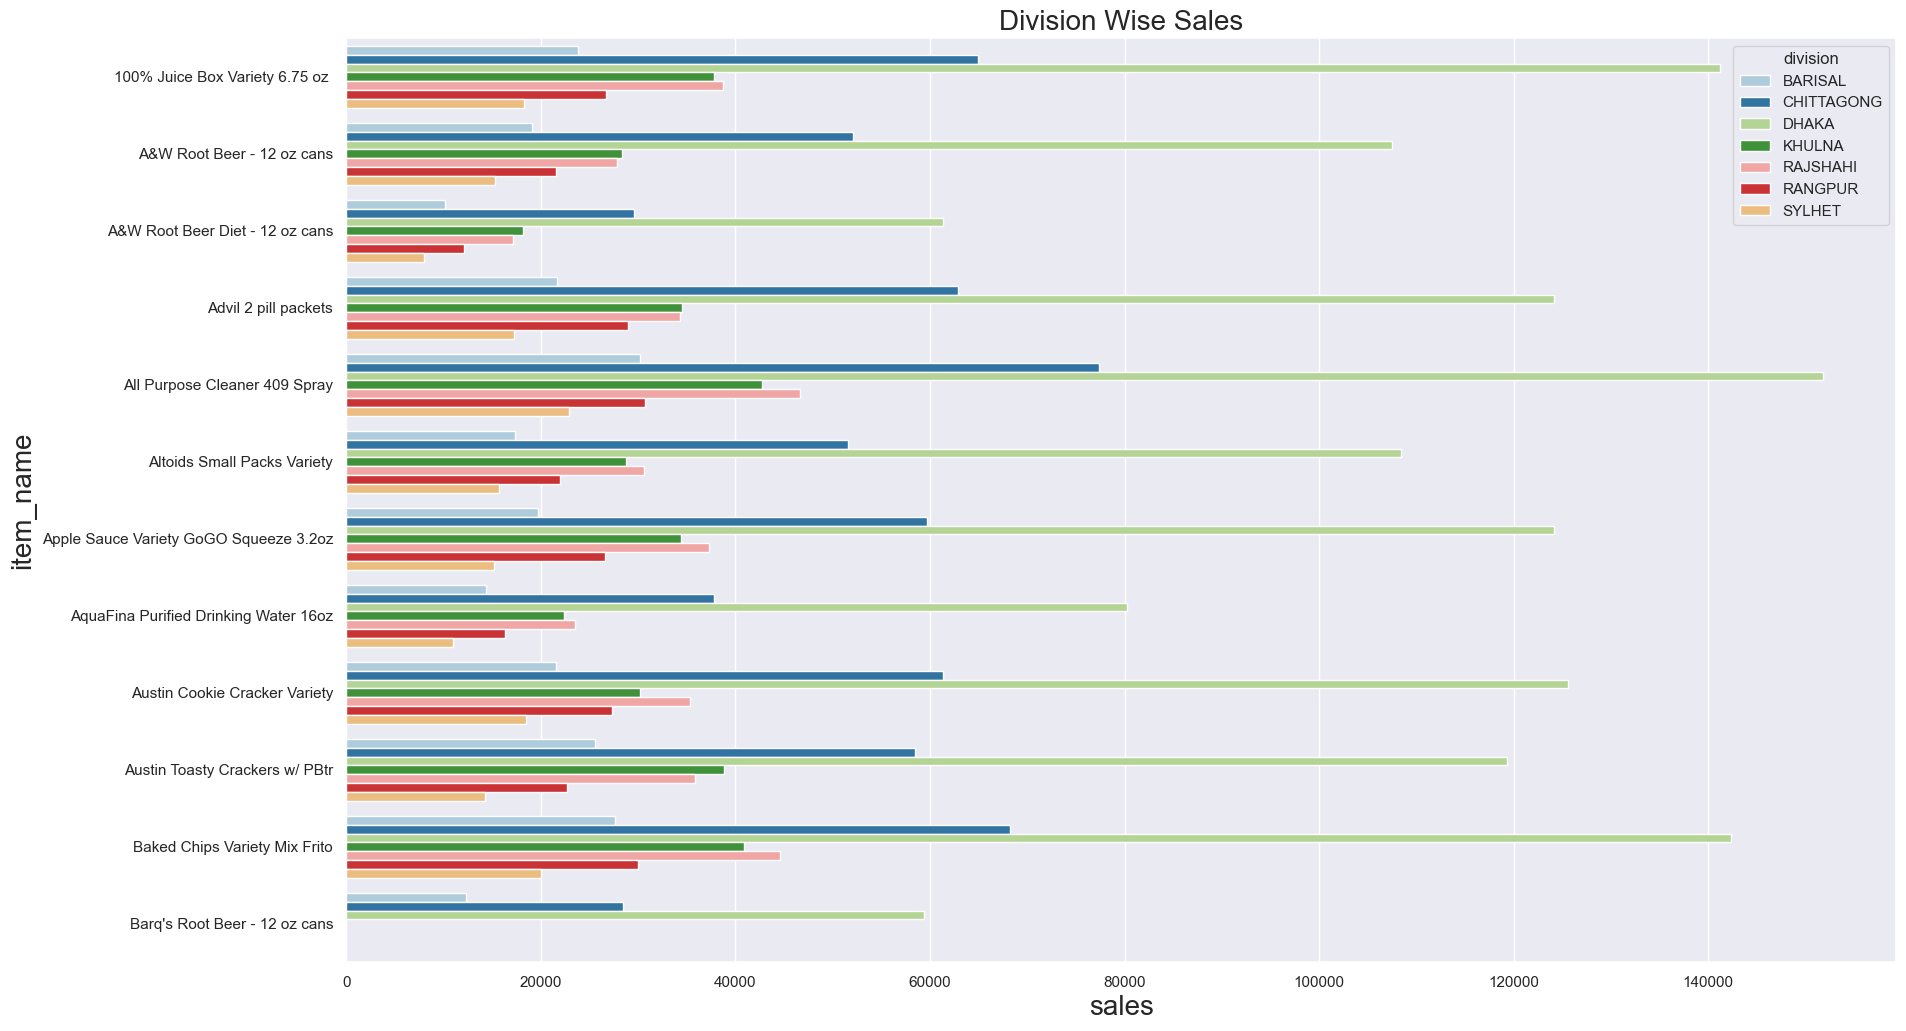

In [410]:
item_div = df_q8.head(80)
fig, ax = plt.subplots(figsize = (20,12))
plt.title('Division Wise Sales',fontsize=20)
plt.xlabel('Item Name',fontsize=20)
plt.ylabel('Sales',fontsize=20)
sns.barplot(data=item_div, x='sales',y='item_name',hue='division',ax=ax,palette='Paired')

<Axes: title={'center': 'Division Wise Sales'}, xlabel='sales', ylabel='division'>

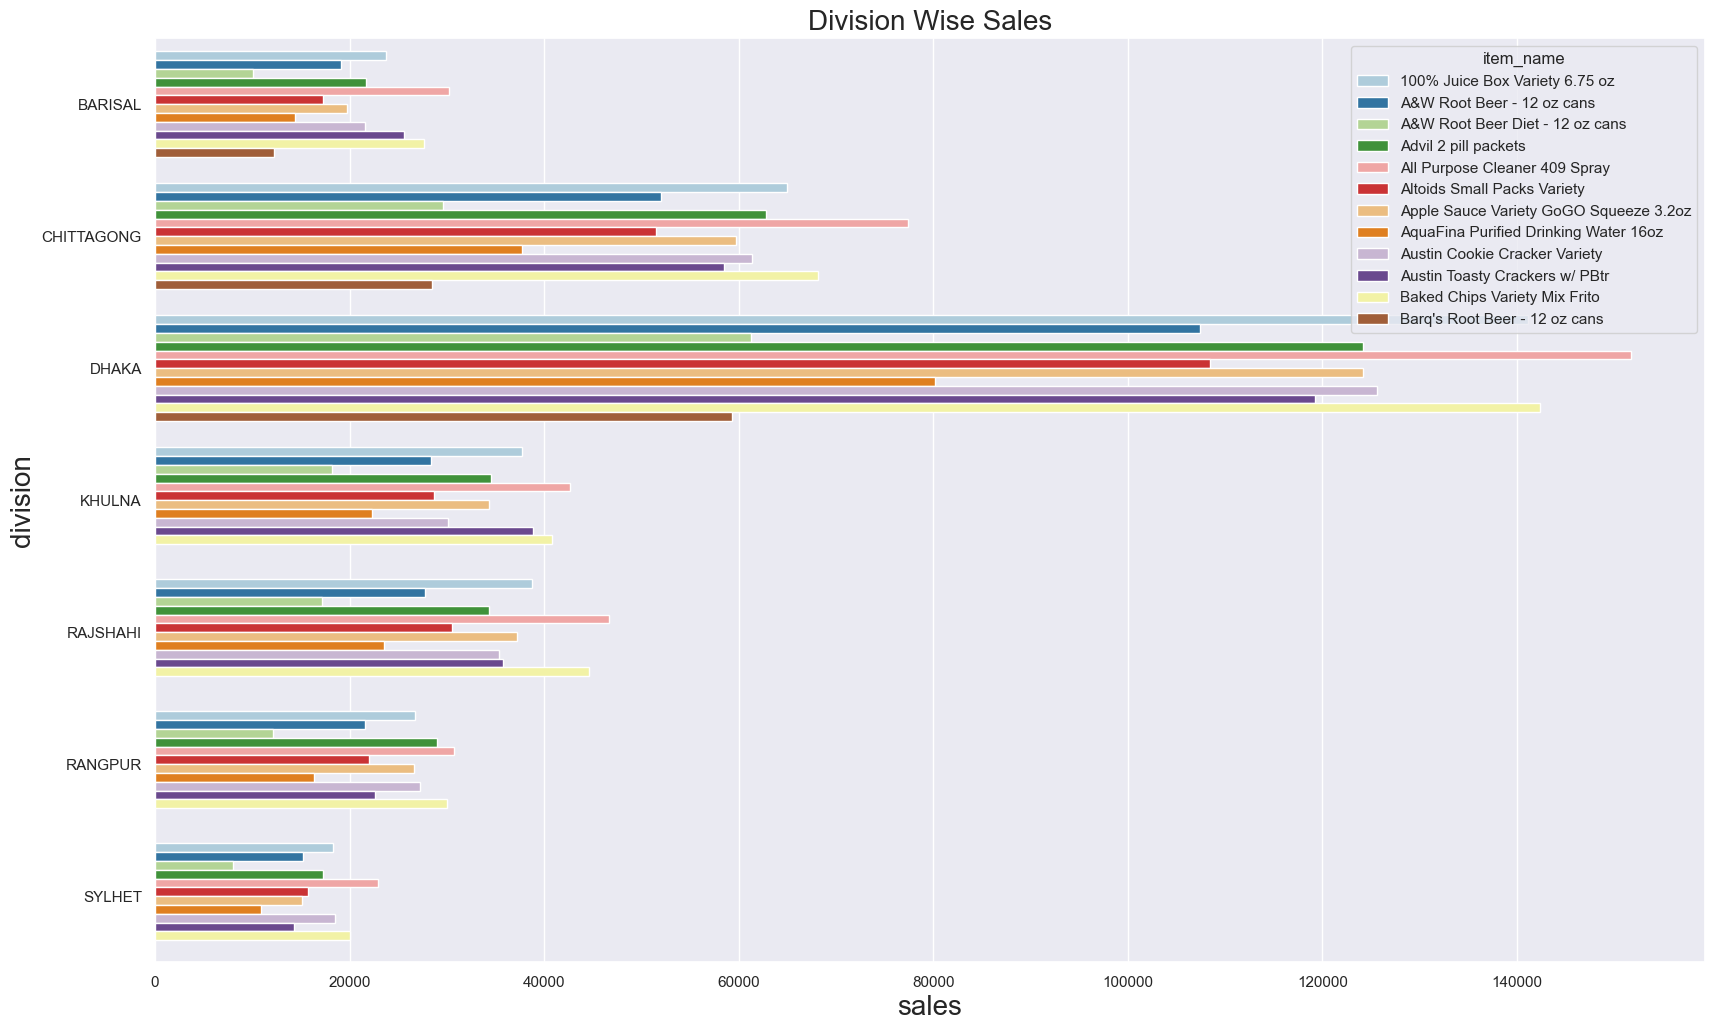

In [411]:
# div_item = item_div
div_item = df_q8.head(80)
fig, ax = plt.subplots(figsize = (20,12))
plt.title('Division Wise Sales',fontsize=20)
plt.xlabel('Division',fontsize=20)
plt.ylabel('Sales',fontsize=20)
sns.barplot(data=div_item, y='division',x='sales',hue='item_name',ax=ax,palette='Paired')

# Q10: What are the average sales of products sales per store monthly?

      S1->M1-> avg_sales

      s1-> M2 -> avg_sales

In [412]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmt = '''
    SELECT s.store_key, tim.month, avg(f.total_price)
    FROM star_schema.fact_table f
    JOIN star_schema.store_dim s ON s.store_key = f.store_key
    JOIN star_schema.time_dim tim ON tim.time_key = f.time_key
    GROUP BY CUBE(s.store_key, tim.month)
    ORDER BY s.store_key, tim.month
'''
curr.execute(select_stmt)
records = curr.fetchall()

Connection to DB established!


In [413]:
records

[('S0001', 1, Decimal('97.7543103448275862')),
 ('S0001', 2, Decimal('100.5776699029126214')),
 ('S0001', 3, Decimal('109.4158878504672897')),
 ('S0001', 4, Decimal('98.8805309734513274')),
 ('S0001', 5, Decimal('99.5245535714285714')),
 ('S0001', 6, Decimal('101.2459349593495935')),
 ('S0001', 7, Decimal('103.9189189189189189')),
 ('S0001', 8, Decimal('105.1269531250000000')),
 ('S0001', 9, Decimal('96.1901041666666667')),
 ('S0001', 10, Decimal('104.6166666666666667')),
 ('S0001', 11, Decimal('103.8355855855855856')),
 ('S0001', 12, Decimal('107.8697478991596639')),
 ('S0001', None, Decimal('102.5407569141193595')),
 ('S0002', 1, Decimal('98.2902684563758389')),
 ('S0002', 2, Decimal('106.3849557522123894')),
 ('S0002', 3, Decimal('102.7565217391304348')),
 ('S0002', 4, Decimal('104.0798969072164948')),
 ('S0002', 5, Decimal('109.1587591240875912')),
 ('S0002', 6, Decimal('100.9268867924528302')),
 ('S0002', 7, Decimal('95.6513157894736842')),
 ('S0002', 8, Decimal('108.9462809917355

In [414]:
df_q10 = pd.DataFrame(records, columns=['store_key','month','avg_sales'])
df_q10 = df_q10.dropna()
df_q10

,store_key,month,avg_sales
0,S0001,1.0,97.7543103448275862
1,S0001,2.0,100.5776699029126214
2,S0001,3.0,109.4158878504672897
3,S0001,4.0,98.8805309734513274
4,S0001,5.0,99.5245535714285714
...,...,...,...
9432,S0099,8.0,96.2933673469387755
9433,S0099,9.0,114.1365740740740741
9434,S0099,10.0,102.7897727272727273
9435,S0099,11.0,107.3810679611650485


In [418]:
plot_data = df_q10.head(96)
plot_data

,store_key,month,avg_sales
0,S0001,1.0,97.7543103448275862
1,S0001,2.0,100.5776699029126214
2,S0001,3.0,109.4158878504672897
3,S0001,4.0,98.8805309734513274
4,S0001,5.0,99.5245535714285714
...,...,...,...
98,S0008,8.0,101.7021739130434783
99,S0008,9.0,104.9410569105691057
100,S0008,10.0,115.8223140495867769
101,S0008,11.0,110.8250000000000000


<Axes: title={'center': 'Average of Store Sales Monthly'}, xlabel='month', ylabel='avg_sales'>

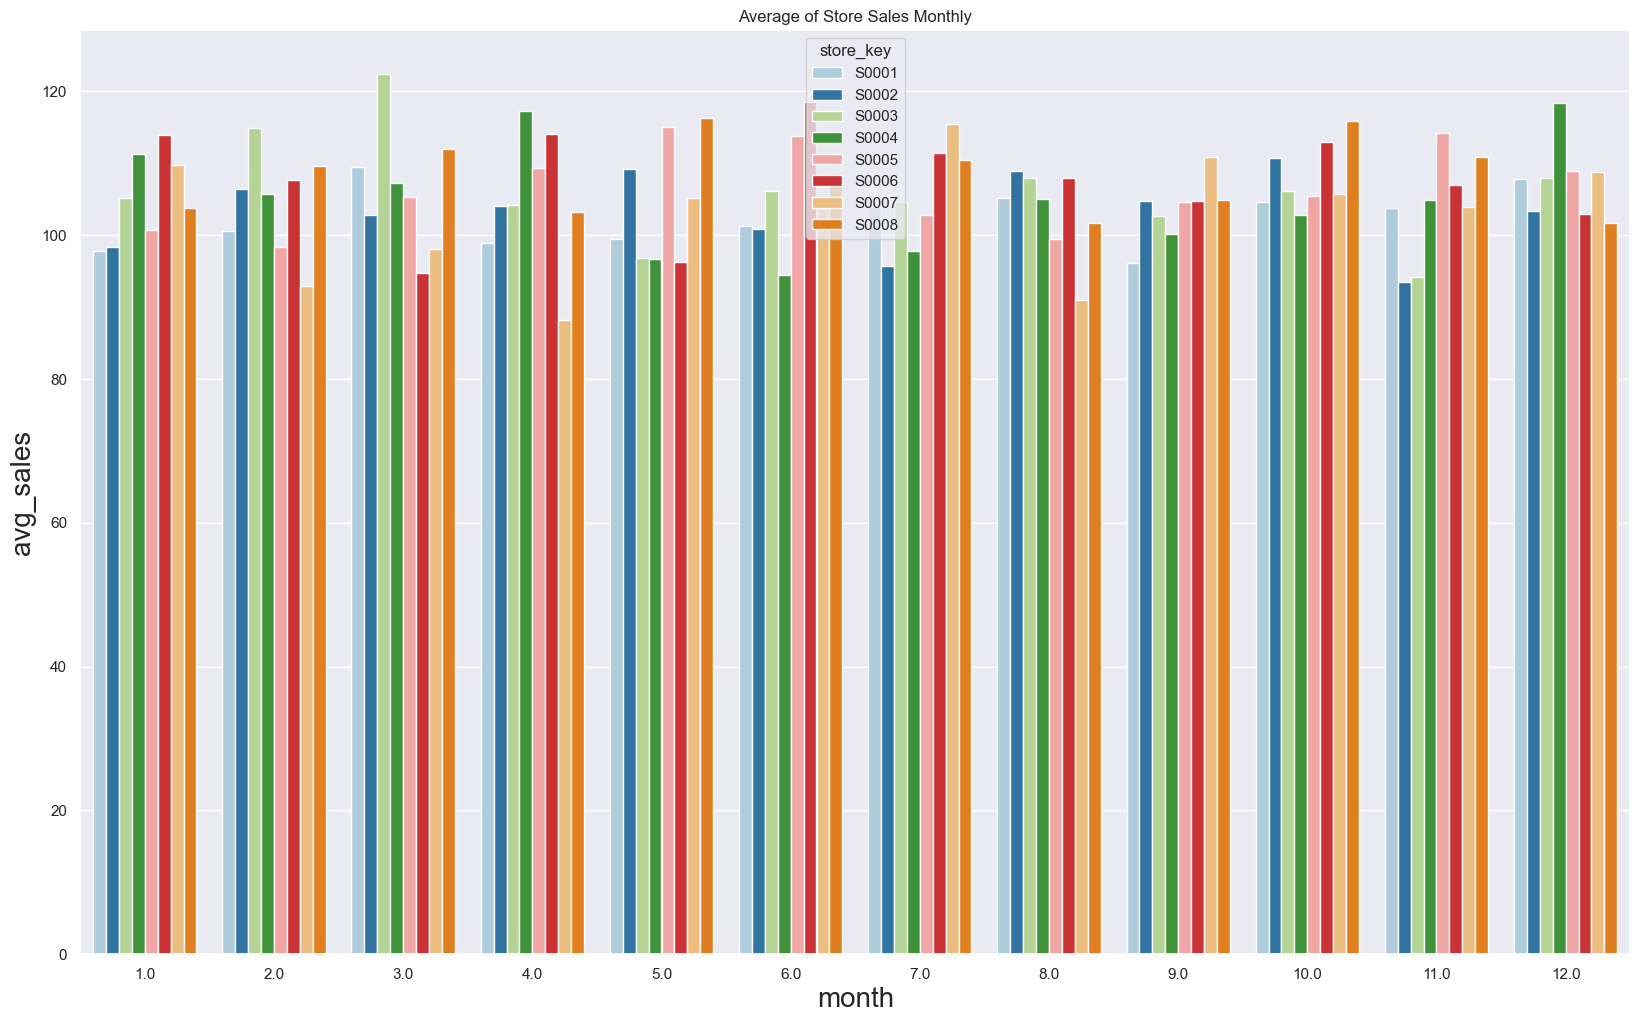

In [420]:

fig, ax = plt.subplots(figsize = (20,12))
plt.title('Average of Store Sales Monthly')
plt.xlabel('Sales',fontsize=20)
plt.ylabel('Month',fontsize=20)
sns.set(font_scale=3.0)
sns.set_context("notebook")
sns.barplot(data=plot_data, x='month',y='avg_sales',hue='store_key',ax=ax,palette='Paired')

In [424]:
plot_data['month'] = plot_data['month'].astype('int')
plot_data['avg_sales'] = plot_data['avg_sales'].astype('float')
plot_data['store_key'] = plot_data['store_key'].astype('str')

C:\Users\Dell\AppData\Local\Temp\ipykernel_9344\3629474103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['month'] = plot_data['month'].astype('int')
C:\Users\Dell\AppData\Local\Temp\ipykernel_9344\3629474103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['avg_sales'] = plot_data['avg_sales'].astype('float')
C:\Users\Dell\AppData\Local\Temp\ipykernel_9344\3629474103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

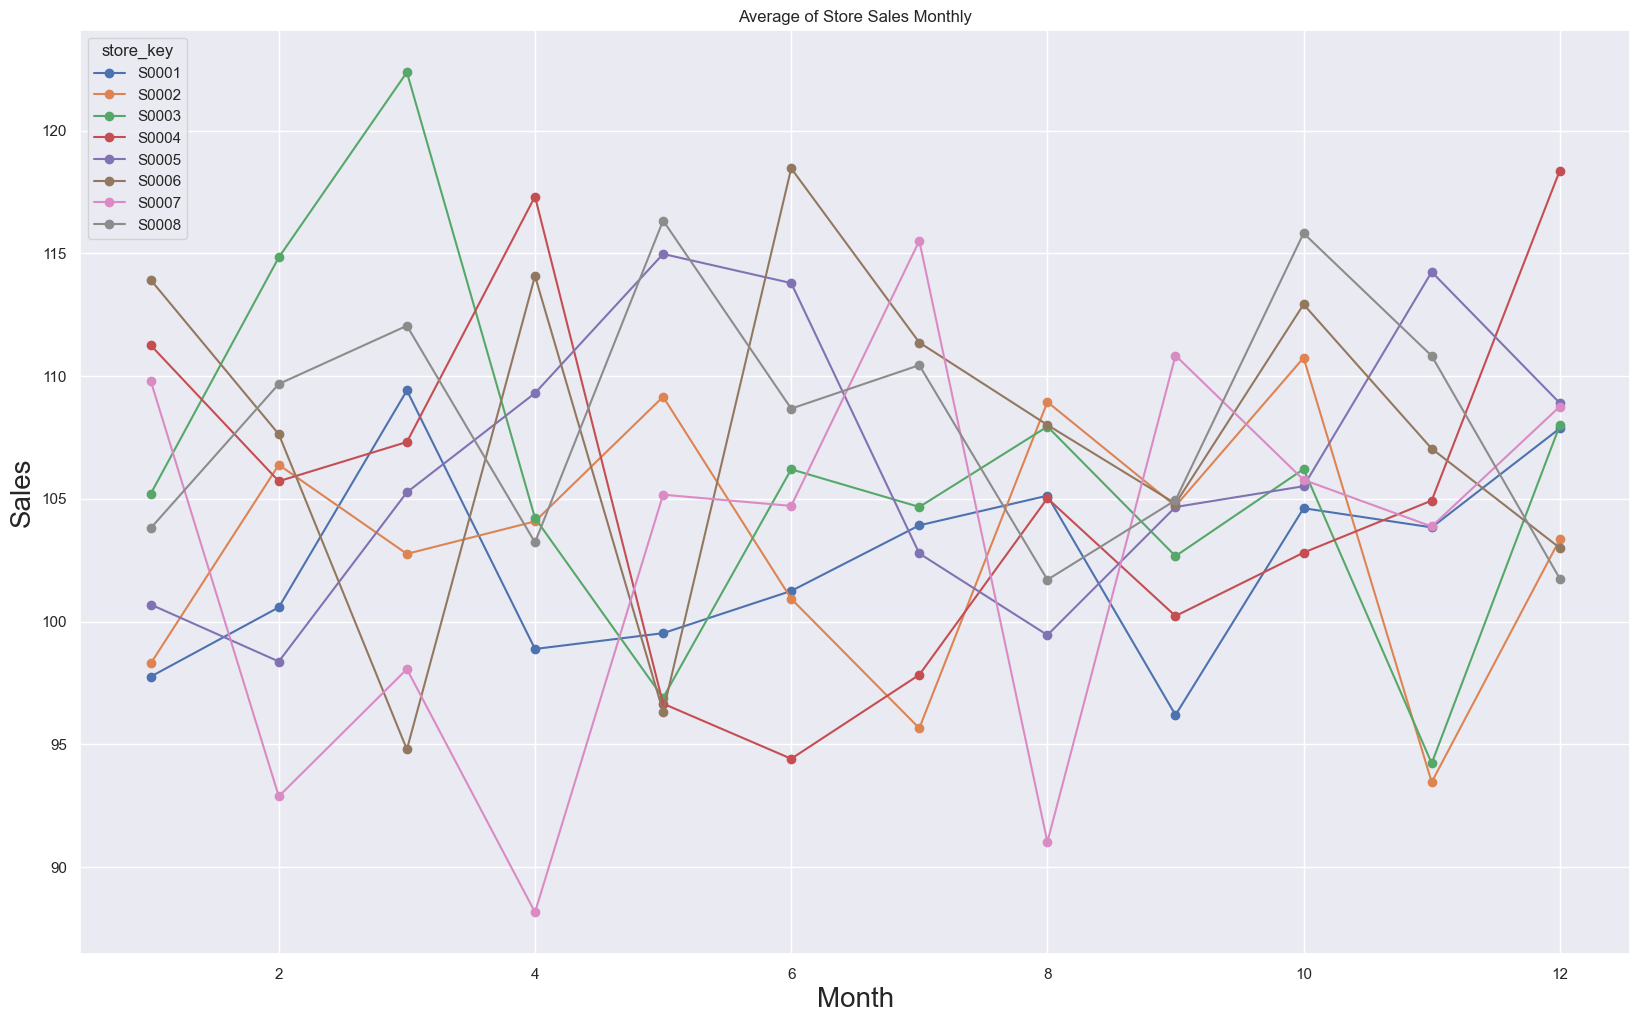

In [425]:
plot_data2 = plot_data
pivot_df = plot_data2.pivot(index='store_key', columns='month', values='avg_sales')
pivot_df.T.plot(marker='o',linestyle='-', figsize=(20,12))
plt.title('Average of Store Sales Monthly')
plt.xlabel('Month',fontsize=20)
plt.ylabel('Sales',fontsize=20)
plt.show()